In [3]:
!pip install transformers accelerate torch -q

In [1]:
!pip install git+https://github.com/huggingface/diffusers@main

  Cloning https://github.com/huggingface/diffusers (to revision main) to /tmp/pip-req-build-w10sawzc
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-w10sawzc
  Resolved https://github.com/huggingface/diffusers to commit 0ec64fe9fc5e2ddf1019f71772f30d71520afacc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [13]:
pip install diffusers

In [2]:
pip install diffusers transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [32]:
import torch
from diffusers import ShapEPipeline
from diffusers.utils import export_to_gif

ckpt_id = "openai/shap-e"
pipe = ShapEPipeline.from_pretrained(ckpt_id).to("cuda")

guidance_scale = 15.0
prompt = "Laptop"
images = pipe(
    prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=64,
    #size=256,
).images

The config attributes {'renderer': ['shap_e', 'ShapERenderer']} were passed to ShapEPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'renderer': ['shap_e', 'ShapERenderer']} are not expected by ShapEPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--openai--shap-e/snapshots/7bd337afdea1c17842e1c3cc45c4e268356dba40/prior: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--openai--shap-e/snapshots/7bd337afdea1c17842e1c3cc45c4e268356dba40/prior.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--openai--shap-e/snapshots/7bd337afdea1c17842e1c3cc45c4e268356dba40/shap_e_renderer: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--openai--shap-e/snapshots/7bd337afdea1c17842e1c3cc45c4e268356dba40/shap_e_renderer.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/127 [00:00<?, ?it/s]

In [33]:
if isinstance(images[0], list):
    images = images[0]

# Convert all images to RGB mode if necessary
images = [img.convert("RGB") for img in images]

# Save images as a GIF
gif_path = "3D_Img.gif"
images[0].save(
    gif_path,
    save_all=True,
    append_images=images[1:],
    duration=100,  # Duration per frame in milliseconds
    loop=0         # Loop forever
)

print(f"GIF saved as {gif_path}")

GIF saved as 3D_Img.gif


In [34]:
images

[<PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>]

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

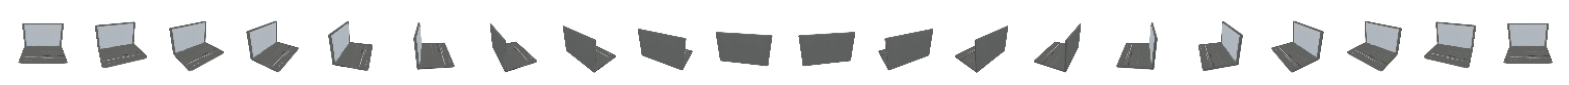

In [31]:
# Convert PIL images to numpy arrays for plotting
images_np = [np.array(img) for img in images]

# Set up the figure and axis
fig, axes = plt.subplots(1, len(images), figsize=(20, 5))

# Plot each image
for ax, img_np in zip(axes, images_np):
    ax.imshow(img_np)
    ax.axis('off')

plt.show()